In [4]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
from astropy import units as u
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
from tqdm import tqdm

In [ ]:
#Get spectra for objects

rar = pd.read_csv('E:/catalogues/final_quasar_catalogue.csv', sep=',', usecols=['RA'],squeeze=True)
decr = pd.read_csv('E:/catalogues/final_quasar_catalogue.csv', sep=',', usecols=['DEC'],squeeze=True)
shitty_targets = []

source_list = [np.array(['source'])]
for row in tqdm(range(6502,len(rar))):
    #try:
    ra = rar[row]
    dec = decr[row]
    pos = coords.SkyCoord(ra, dec, unit=u.deg)
    xid = SDSS.query_region(pos,obj_names=id,spectro=True)
    sp = SDSS.get_spectra(matches=xid)[0]
    a = sp[1].data['loglam']
    flux = sp[1].data['flux']
    spectrum = np.concatenate(([a],[flux]),axis=0)
    source = [np.array([xid[0]['instrument']])]
    source_list = np.concatenate((source_list,source),axis=0)
    with open('E:/spectra/' + str(row) + 'sp.pickle','wb') as wfile:
        pickle.dump(spectrum,wfile)
    #except:
    #    shitty_targets.append(row)

'''fig, ax = plt.subplots(figsize=(14.,8.5))
for i in np.arange(xid['ra'].size):
    ax.plot(10.**sp[i][1].data['loglam'],sp[i][1].data['flux'],label=xid['instrument'][i])
ax.set_ylabel('Flux [10$^{-17}$ ergs/cm$^2$/s/\AA]')
ax.set_xlabel('Wavelength [\AA]')
ax.legend(loc='upper right')'''

  0%|▎                                                                           | 67/14634 [17:29<54:15:34, 13.41s/it]

In [ ]:
import os

fig = plt.figure(figsize=(10,5))
ax = plt.subplot()
for file in os.listdir('F:/spectra/'):
    file = 'F:/spectra/{}'.format(file)
    with open(file,'rb') as rfile:
        sp = pickle.load(rfile)
    ax.scatter(10.**sp[0],sp[1]/np.max(sp[1]),c='blue',s=0.00005)#,label=xid['objid'])
ax.set_ylabel('Flux [10$^{-17}$ ergs/cm$^2$/s/angstrom]')
ax.set_xlabel('Wavelength [Angstroms]')
ax.set_ylim(0)
#ax.legend(loc='upper right')

4616
3567.7969
10325.231


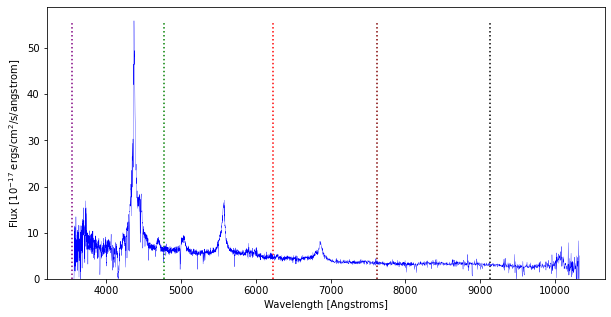

In [30]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot()

file = 'E:/spectra/5420sp.pickle'
with open(file,'rb') as rfile:
    sp = pickle.load(rfile)
ax.plot(10.**sp[0],sp[1],c='blue',linewidth=0.3)#,label=xid['objid'])
ax.set_ylabel('Flux [10$^{-17}$ ergs/cm$^2$/s/angstrom]')
ax.set_xlabel('Wavelength [Angstroms]')
ax.vlines(3543,0,np.max(sp[1]),color='purple',linestyles='dotted')
ax.vlines(4770,0,np.max(sp[1]),color='green',linestyles='dotted')
ax.vlines(6231,0,np.max(sp[1]),color='red',linestyles='dotted')
ax.vlines(7625,0,np.max(sp[1]),color='maroon',linestyles='dotted')
ax.vlines(9134,0,np.max(sp[1]),color='black',linestyles='dotted')
ax.set_ylim(0)
print(len(sp[1]))
print(np.min(10**sp[0]))
print(np.max(10**sp[0]))

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot()

file = 'E:/spectra/1sp.pickle'
with open(file,'rb') as rfile:
    sp = pickle.load(rfile)
ax.plot(10.**sp[0],sp[1],c='blue',linewidth=0.3)#,label=xid['objid'])
ax.set_ylabel('Flux [10$^{-17}$ ergs/cm$^2$/s/angstrom]')
ax.set_xlabel('Wavelength [Angstroms]')
ax.vlines(3543,0,np.max(sp[1]),color='purple',linestyles='dotted')
ax.vlines(4770,0,np.max(sp[1]),color='green',linestyles='dotted')
ax.vlines(6231,0,np.max(sp[1]),color='red',linestyles='dotted')
ax.vlines(7625,0,np.max(sp[1]),color='maroon',linestyles='dotted')
ax.vlines(9134,0,np.max(sp[1]),color='black',linestyles='dotted')
ax.set_ylim(0)

In [3]:
pip install astroquery

  Created wheel for astroquery: filename=astroquery-0.4.1-py3-none-any.whl size=3831877 sha256=f5816564f0f4e95ecd408607b29ecf1b504a7ed74c2ac50e17a17abef740ed36
  Stored in directory: c:\users\abcmo\appdata\local\pip\cache\wheels\38\a3\2c\65f38691eef2c25e74f1ab45186b67e09cea7b59696fd67696
Successfully built astroquery
Note: you may need to restart the kernel to use updated packages.


In [ ]:
np.load('E')